# Conținut *Feature Engineering*:
## [0. Introducere](#0)
## [1. Setul de date  *House Price*](#1)
## [2. Importul biblitecilor și datelor](#2)
## [3. Formarea seturilor de training și de test](#3)
## [4. Esența ingineriei caracteristicilor](#4)
## [5. Variabila etichetă](#5)
## [6. Valorile lipsă](#6)
### [6.1. Lipsurile valorilor categoriale](#61)
### [6.2. Lipsurile valorilor numerice](#62)
## [7. Transformarea variabilelor de timp](#7)
## [8. Transformarea variabilelor numerice](#8)
### [8.1. Transformarea algoritmică](#81)
### [8.2. Transformarea Yeo-Johnson](#82)
### [8.3. Transformata binară](#83)
## [9. Transformarea variabilelor categoriale](#9)
### [9.1.Maparea variabilelor de calitate](#91)
### [9.2. Eliminarea valorilor rare](#92)
### [9.3. Codarea variabilelor categoriale](#93)
## [10. Scalarea caracteristicilor](#10)
## [11. Salvarea datelor procesate](#11)


<a id='0'></a>
# 0. Introducere

În acest ciclu de fișiere notebook, vom descrie metodologia de implementare a fiecăruia dintre pașii necesari elaborării unui model Machine Learning.

Se va discuta despre:

1. Data Analysis
2. **Feature Engineering**
3. Feature Selection
4. Model Training
5. Obținerea predicțiilor / Scoring

În acest notebook se va aborda subiectul **Feature Engineering**

<a id='1'></a>
# 1. Setul de date  *House Price*

Vom utiliza setul de date **house price** disponbil pe [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Vezi mai jos detaliile setului de date.

===================================================================================================

### Predicția Prețului de Vânzare a Caselor

Scopul proiectului este de a construi un model machine learning pentru a prezice prețul de vânzare al caselor pe baza diferitelor variabile explicative ce descriu aspecte ale caselor rezidențiale.


### De ce este atât de important? 

Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.
Predicția prețurilor caselor este utilă pentru a identifica investițiile sau pentru a determina dacă prețul anunțat pentru o casă este supraestimat sau subestimat.


### Care este obiectivul modelului machine learning?

Ne propunem să minimizăm diferența dintre prețul real și prețul estimat de modelul nostru. Vom evalua performanța modelului cu:

1. eroare medie pătratică (mse - mean squared error)
2. rădăcina pătrată a erorii medii pătratice (rmse - root squared of the mean squared error)
3. r pătrat (r2 - r-squared).


### Cum se descarcă setul de date?

- Se accesează [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Se logează **log in** (preventiv se crează un cont).

- Se descarcă fișierul **'train.csv'** și se salvează în folderul cu fișierul notebook curent.

- Se descarcă fișierul **'test.csv'** și se salvează în același folder.

<a id='2'></a>
# 2. Importul biblitecilor și datelor

In [1]:
# pentru gestionarea setului de date
import pandas as pd
import numpy as np

# pentru afișarea grafică
import matplotlib.pyplot as plt
import seaborn as sns

# pentru transforamrea yeo-johnson
import scipy.stats as statsformation
import scipy.stats as stats

# pentru divizarea setului de date in set de training si set de test
from sklearn.model_selection import train_test_split

# pentru scalara caracteristicilor datelor
from sklearn.preprocessing import MinMaxScaler

# pentru salvarea modelului de scalare
import joblib

# pentru afișarea tutror coloanelor dataframe în notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# încărcarea datelor
data = pd.read_csv('train.csv')

# afișarea numarului de lini și coloane
print(data.shape)

# vizualizarea primelor 5 date ale setului
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# ștergera coloanei id
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

<a id='3'></a>
# 3. Formarea seturilor de training și de test

Este foarte important a se separa daatele în date training și date de test. 

La procesarea caracteriscililor, unele tehnici realizează învățțarea parametrilor din date și e foarte important ca acestea să fie datele doar din setul de training, astfel evitându-se efectul overfitting.

În tehnicile feature engineering se vor învăța:

- valoarea medie
- valoarea modă
- exponenții transformării yeo-johnson
- categoriile de frecvențăcategory frequency
- categoriile numereului de mapare

din setul de training.

**Separarea datelor în set training și set de testare implică proceduri aleatorii, prin urmare, trebuie ținem cont de set the seed.**

In [4]:
# Separarea datelor în set de training și set de test cu utilizarea random_state pentru setare seed

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'], axis=1), # se exclude variabila eticheta
    data['SalePrice'], # variabila eticheta
    test_size=0.1, # proporția setului de test
    random_state=9, # setarea parametrului seed
)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

<a id='4'></a>
# 4. Esența ingineriei caracteristicilor

În continuare, asupra setului de date **House Price** se vor aplica tehnici ale ingineriei caracteristicilor și anume:

1. Gestionarea valorilor lipsă
2. Gestionarea variabilelor de timp
3. Gestionarea variabilelor continue cu distribuție Non-Gaussian 
4. Gestionarea variabilelor categoriale prin eliminarea valorilor rare
5. Gestionarea variabilelor categoriale prin conversia stringurilor în numere
5. Setarea tuturor variabielor într-o singură scară de valori

<a id='5'></a>
# 5. Variabila etichetă

Se analizează distibuțiua variabilei etichetă pentru fiecare set

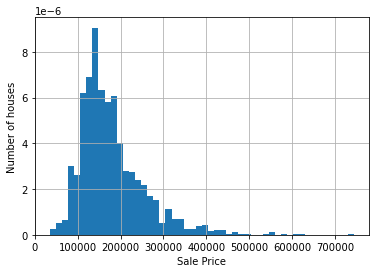

In [5]:
# histograma distribuției etichetei setului de training

y_train.hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

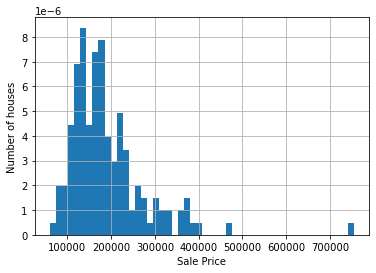

In [6]:
# histograma distribuției etichetei setului de test

y_test.hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

In [7]:
# transforamrea etichetelor cu ajutorul transformatei logaritmice
y_train = np.log(y_train)
y_test = np.log(y_test)

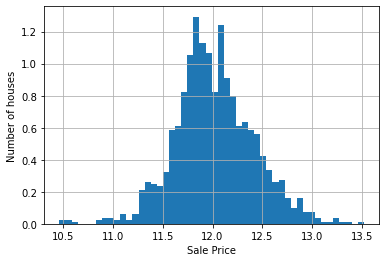

In [8]:
# histograma distribuției etichetei transformate a setului de training

y_train.hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

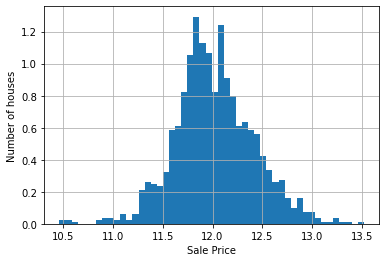

In [9]:
# histograma distribuției etichetei transformate a setului de test

y_train.hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

<a id='6'></a>
# 6. Valorile lipsă 
<a id='61'></a>
## 6.1. Lipsurile valorilor categoriale

Lipsurile în variabilele cu multe valorile lipsă se vor înlocui cu stringul „missing” .

În cazul variabielor cu puține valori lipsă, lipsurile se vor încolui cu cea mai frecventă valoare a variabielei respective.


In [10]:
# Identificarea și includera într-o listă a variabielor categoriale

cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# MSSubClass de deasemenea de tip categorial deși area valoare numerica
# (esența variabileor poate fi găsită în fișierul data_description.txt
# disponibil pe Kaggle, pe aceași pagină de unde au fost descărcate datele)

# Adăugarea MSSubClass în lista variabilor categoriale
cat_vars = cat_vars + ['MSSubClass']

# Numarul variabilelor categoriale
len(cat_vars)

44

In [11]:
# crearea unei liste cu toate variavbilele categoriale ce conțin lipsuri în setul de training

cat_vars_with_na = [ var for var in cat_vars if X_train[var].isnull().sum() > 0 ]

# deteminarea procentajului de date lipsă (exprimat zecimal)
# și afișarea în ordine descrescătoare

X_train[cat_vars_with_na ].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.962709
Alley           0.936073
Fence           0.805175
FireplaceQu     0.476408
GarageType      0.055556
GarageFinish    0.055556
GarageQual      0.055556
GarageCond      0.055556
BsmtExposure    0.023592
BsmtFinType2    0.023592
BsmtQual        0.022831
BsmtCond        0.022831
BsmtFinType1    0.022831
MasVnrType      0.006088
Electrical      0.000761
dtype: float64

In [12]:
# variabilele a căror lipsuri vor fi substiuite cu missing
with_string_missing = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() > 0.1]

# variabilele a căror lipsuri vor fi substiuite cu valoarea cea mai frecventă
with_frequent_category = [
    var for var in cat_vars_with_na if X_train[var].isnull().mean() < 0.1]

In [13]:
with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
# substituirea lipsurilor cu valoarea "Missing"

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [15]:
# substituirea lipsurilor cu valoarea modă
for var in with_frequent_category:
    
    # pot fi mai multe valori cu frecvența maire (mai multe mode)there can be more than 1 mode in a variable
    # se va alege prima modă   
    mode = X_train[var].mode()[0]
    
    print(var, mode)
    
    X_train[var].fillna(mode, inplace=True)
    X_test[var].fillna(mode, inplace=True)

MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [16]:
# se verific daca au fost excluse toate lipsurile în variabilele categoriale de training

X_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [17]:
# se verific daca au fost excluse toate lipsurile în variabilele categoriale de test

[var for var in cat_vars_with_na if X_test[var].isnull().sum() > 0]

[]

<a id='62'></a>
## 6.2. Lipsurile valorilor numerice

Pentru gestionarea valorilor lipsă a variabilelor numerice se va:

- stabili un indicator binar variabilei
- apoi se va substitui valoarea lipsă a variabilei originale cu  medie a acesteai

In [18]:
# identificarea variabilelor numerice

num_vars = [
    var for var in X_train.columns if var not in cat_vars and var != 'SalePrice'
]

# numarul variabielor numerice
len(num_vars)

35

In [19]:
# elaborarea unei liste cu variabiele numerice cu lipsuri
vars_with_na = [
    var for var in num_vars
    if X_train[var].isnull().sum() > 0
]

# afișarea procentajului lipsurilor
X_train[vars_with_na].isnull().mean()

LotFrontage    0.175038
MasVnrArea     0.006088
GarageYrBlt    0.055556
dtype: float64

In [20]:
# substituirea valorilor lipsa

for var in vars_with_na:

    # deteminarea valori medii a variabiei in setul de training
    mean_val = X_train[var].mean()
    
    print(var, mean_val)

    # asetarea unui indicator binar variabilei (în ambele seturi)
    X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)

    # substituirea lipsurilor cu valore medie (în ambele seturi)
    X_train[var].fillna(mean_val, inplace=True)
    X_test[var].fillna(mean_val, inplace=True)

# se verific daca au fost excluse toate lipsurile în variabilele numerice de training
X_train[vars_with_na].isnull().sum()

LotFrontage 70.17250922509226
MasVnrArea 104.17611026033691
GarageYrBlt 1978.2070910556004


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [21]:
# se verific daca au fost excluse toate lipsurile în variabilele numerice de test

[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

<a id='7'></a>
# 7. Transformarea variabilelor de timp

La analiza datelor s-a stabilit căci 4 dintre variabiel se referă la ani în care s-a realizat o careva acțiune (construi, vandut, renoval casa, construit garajul). 

Se vor substitui valorile a 3 variabile de timp (exceptan anul vanzarii) cu perioada de la realizarea acestor acțiuni până la anul vânzării. Pentru aceasta se va elabora funcția elapsed_years()

In [22]:
def elapsed_years(df, var):
    # difernța dinte anul vânzarii și anul variabilei corespunzatoare
    df[var] = df['YrSold'] - df[var]
    return df

In [23]:
# aplicarea funcției pe variabiele corespunzatoare (în ambele seturi)
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [24]:
# se exclude variabiela anului vânzarii 'YrSold'
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

<a id='8'></a>
# 8. Transformarea  variabielor numerice
<a id='81'></a>
## 8.1. Transformarea algoritmică

În secțiunea de analiza a datelor s-a observat că variabiele numerice nu au distribuți normată și că distribuția variabilelor "LotFrontage", "1stFlrSF", "GrLivArea" care nu contin valori nule, poate fi apropiată de distribuția Gaussian dacă asupra acestor variabiel se aplică transformata logaritmică.

In [25]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [26]:
# se verifică dacă aceste variabile nu contin valori nule în setul de test
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_test[var].isnull().sum() > 0]

[]

In [27]:
# se verifică dacă aceste variabile nu contin valori nule în setul de training
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if X_train[var].isnull().sum() > 0]

[]

<a id='82'></a>
## 8.2. Transformarea Yeo-Johnson

Se aplică transformata Yeo-Johnson asupra variabilei transformation LotArea.

In [28]:
# transformata yeo-johnson învață cel mai bun exponent al variabilei din setul de training 
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])

# se aplică transformate și asupra setului de test cu acelari parametru din transforamrea setului de training
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)

print(param)

-12.55283001172003


C:\Users\Nicolaev\anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\Nicolaev\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\Nicolaev\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Nicolaev\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [29]:
# verificarea lipsurilor în setul de training
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [30]:
# verificarea lipsurilor în setul de test
[var for var in X_train.columns if X_test[var].isnull().sum() > 0]

[]

<a id='83'></a>
## 8.3. Transformata binară

Asupra variabilelor cu deformare puternică a distribuției se va aplica transformarea binară.

In [31]:
deformate = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in deformate:
    
    # se ubstituie valorile nule cu 0 și celelate cu 1 în ambele seturi
    X_train[var] = np.where(X_train[var]==0, 0, 1)
    X_test[var] = np.where(X_test[var]==0, 0, 1)

<a id='9'></a>
# 9. Transformarea variabilelor categoriale
<a id='91'></a>
## 9.1.Maparea variabilelor de calitate

În descrierae variabilelor setului de date de pe site-ul Kaggle, variabiele de calitate au atribuite unele valori string care pot fi mapate cu valor numerice

In [32]:
# mapara valorilor string cu valori numerice

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_train[var] = X_train[var].map(qual_mappings)
    X_test[var] = X_test[var].map(qual_mappings)

In [33]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_mappings)
X_test[var] = X_test[var].map(exposure_mappings)

In [34]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_train[var] = X_train[var].map(finish_mappings)
    X_test[var] = X_test[var].map(finish_mappings)

In [35]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_mappings)
X_test[var] = X_test[var].map(garage_mappings)

In [36]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_mappings)
X_test[var] = X_test[var].map(fence_mappings)

In [37]:
# Verificarea prezentei lipsurilor în setul de training
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

<a id='92'></a>
## 9.2. Eliminarea valorilor rare

Pentru varaibiele categoriale rămase e determina acele variabele cara au valori cu o pondere mai mica de 1%. Toate aceste valori vor fi cu pondere mică vor fi substituite cu stringul "Rare".


In [38]:
# lista variabielelor de calitate

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# lista variabielor categorile ramase

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [39]:
len(cat_vars)

44

In [40]:
 # funcția de determinarea a valorilor varibilelor care au prezentă mai marea de un anumit porcentaj
def find_frequent_labels(df, var, rare_perc):

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_others:
    
    # determinarea valorilor cu frecvența mia mare de 1%
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    print(var, frequent_ls)
    print()
    
    # substituirea valorilor cu o frecvența mai mica de 1% cu stringul "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Condition2 Ind

<a id='93'></a>
## 9.3. Codarea variabilelor categoriale

În continuare se vor transforam valorile string ale variabielor categorile rămase în valori numerice. 

Pentru aceasta se va utiliza relația variabileli respective cu variabila etichetă.

Funcția replace_categories() va atribui valori discrete stringurilor variabilei astfel încât valorile mai mici se vor atribui acelor categorii ce corespund unei valor medii mai mici în coloana pretului de vânzare.

In [41]:
# funcție replace_categories va atribui valori discrete stringurilor variabilei astfel încât 
# valorile mai mici se vor atribui acelor categorii ce corespund unei valor medii 
# mai mici în coloana pretului de vânzare

def replace_categories(train, test, y_train, var, target):
    
    tmp = pd.concat([X_train, y_train], axis=1)
    
    # ordonarea categoriilor începând de la cele ce au în colona pretului valorea medie cea mai mică 
    #spre cele ci valorea medie cea mia mare
    ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

    # crearea unui dicționar ce va include categorile ordonate ca chei și un numar 
    # întreaga ca valoare începând cu valorea 0
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(var, ordinal_label)
    print()

    # utilizarea dicționarului pentru substituirea stringurilor cu valorea întreagă corespunzătoare
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [42]:
# aplicara functiei asupra variabilelor categoriale rămase
for var in cat_others:
    replace_categories(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'Rare': 1, 'IR1': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Rare': 0, 'Gtl': 1, 'Mod': 2}

Neighborhood {'IDOTRR': 0, 'BrDale': 1, 'OldTown': 2, 'BrkSide': 3, 'Edwards': 4, 'Rare': 5, 'SWISU': 6, 'Sawyer': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'Gilbert': 12, 'CollgCr': 13, 'Blmngtn': 14, 'Crawfor': 15, 'ClearCr': 16, 'Somerst': 17, 'Timber': 18, 'StoneBr': 19, 'NridgHt': 20, 'NoRidge': 21}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'Rare': 0, 'SFoyer': 1, '1.5Fin': 2, '1Story': 3, 'SLvl': 4, '2Story': 5}

RoofStyle

In [43]:
# Verificarea prezentei lipsurilor în setul de training
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [44]:
# Verificarea prezentei lipsurilor în setul de test
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

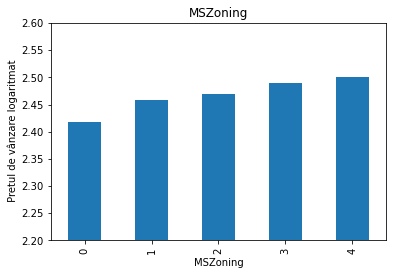

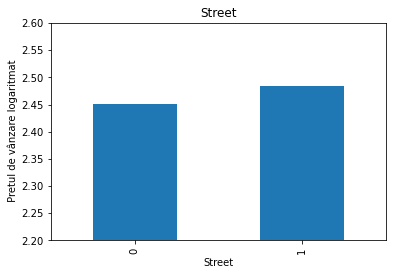

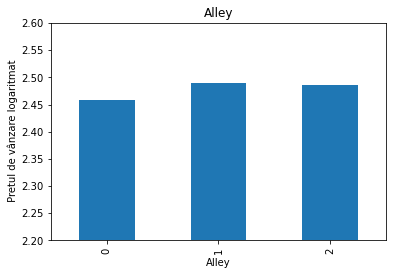

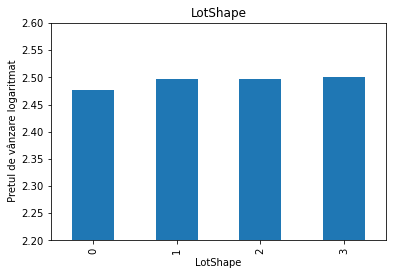

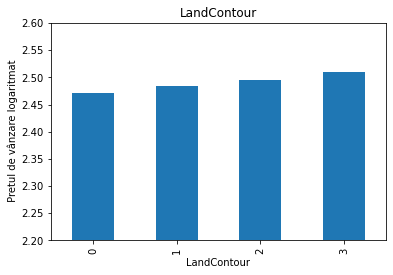

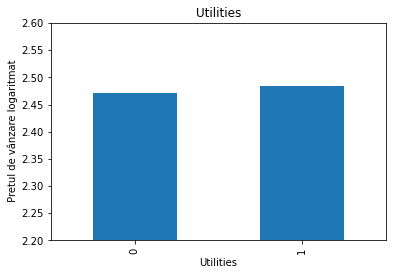

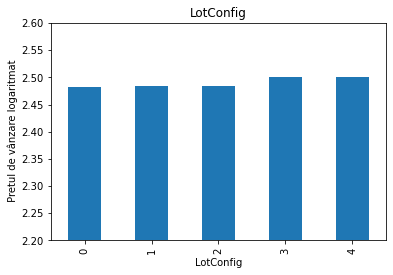

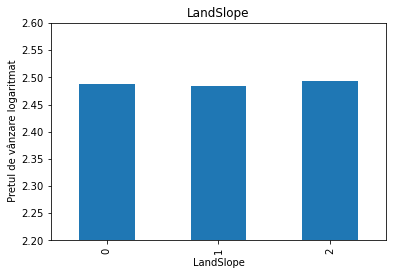

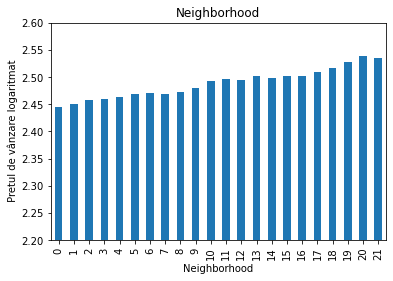

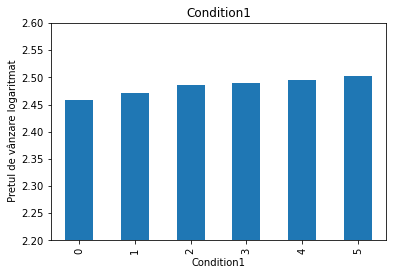

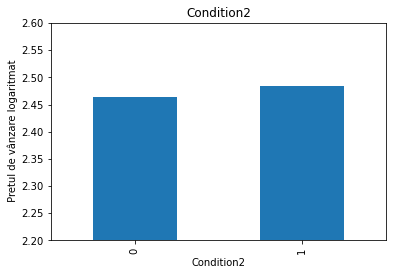

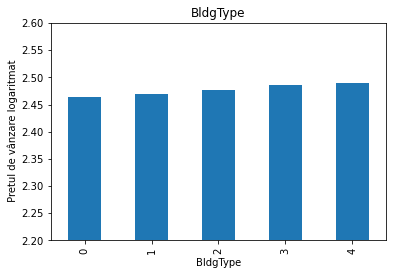

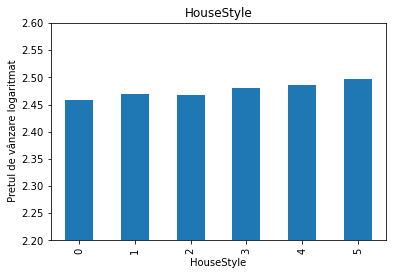

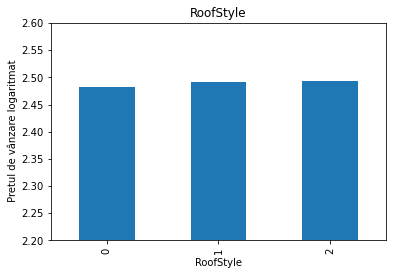

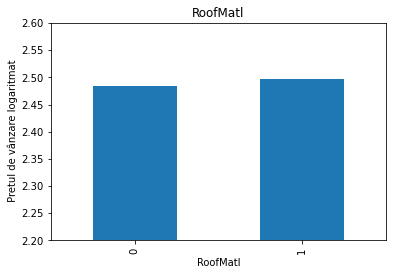

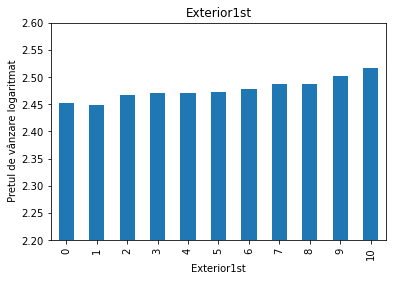

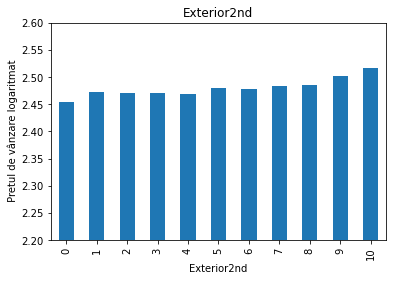

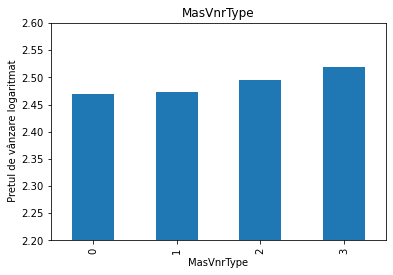

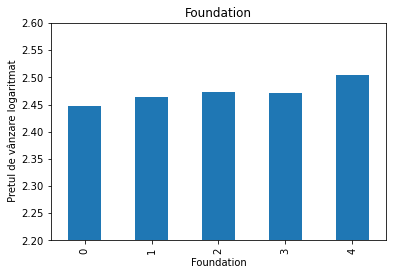

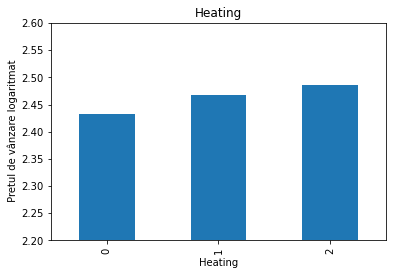

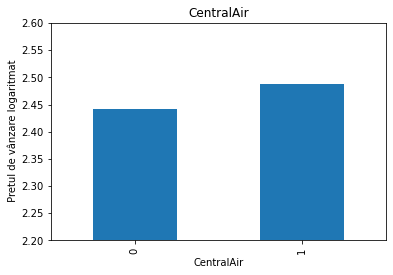

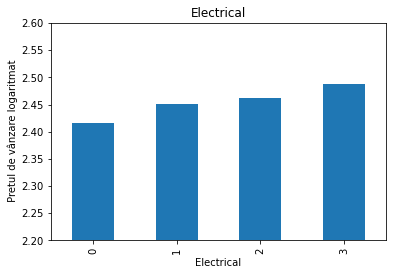

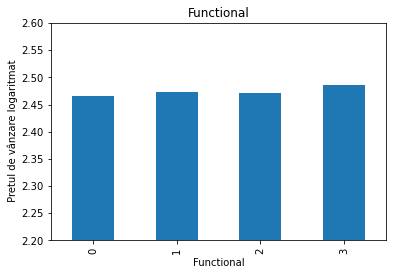

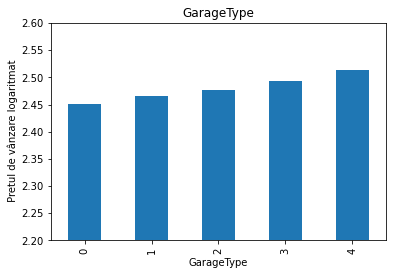

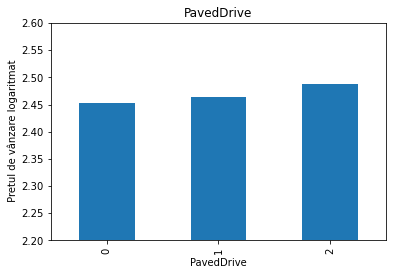

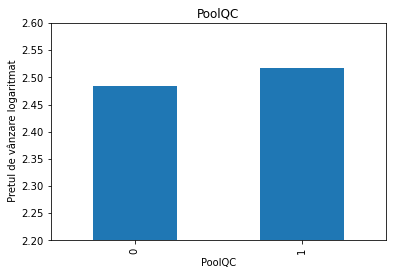

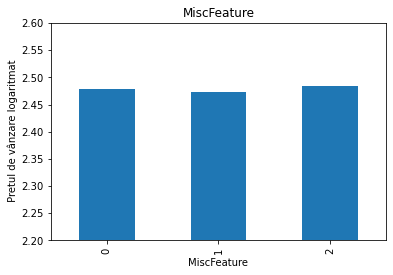

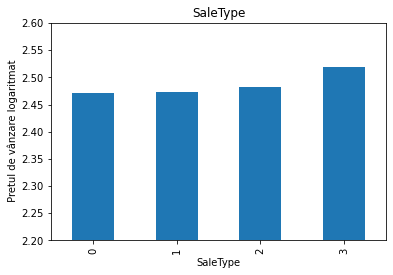

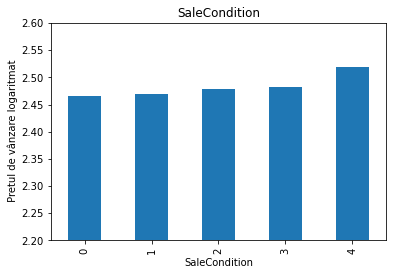

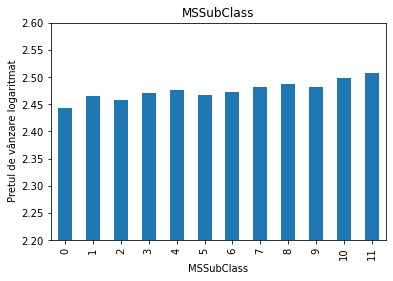

In [45]:
# Funcția de afișare a valorii medi a prețului pentru fiecare valoare codată a variabilelor categoriale

def analyse_vars(train, y_train, var):
      
    tmp = pd.concat([X_train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel(' Pretul de vânzare logaritmat')
    plt.show()
    
for var in cat_others:
    analyse_vars(X_train, y_train, var)

<a id='10'></a>
# 10. Scalarea caracteristicilor

pentru a putea fi utilizate în modele liniare, valorile tutror variabielor trebuie să fie încadrate în aceeași scară. Se vor scala valorile caracteristicilor înte valorile minime și maxime cu ajutorul transformatorului MinMaxScaler:

In [46]:
# crarea transforamtorului
scaler = MinMaxScaler()

#  trainingl transformatorului pe datelele de training
scaler.fit(X_train) 

# Aplicara transformatorului pe datele de training cu converia acestora inapoi in dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)
# Aplicara transformatorului pe datele de test cu converia acestora inapoi in dataframe
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [47]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,1.000000,0.75,0.495064,0.0,1.0,1.0,0.666667,0.333333,1.0,0.0,0.5,0.476190,0.4,1.0,0.75,1.0,0.777778,0.500,0.102941,0.245902,0.0,0.0,0.6,0.5,0.333333,0.00,0.666667,0.50,1.00,0.666667,0.666667,0.333333,1.0,0.139794,0.0,0.0,0.050942,0.148609,1.0,1.00,1.0,1.0,0.386310,0.478450,0.0,0.617765,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.6,0.75,0.130841,1.0,0.50,0.356841,0.5,0.5,1.0,0.163043,0.274223,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.00,0.0,0.0,0.0
1,0.818182,0.75,0.445638,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.5,0.380952,0.4,1.0,0.75,0.6,0.333333,0.750,0.286765,0.655738,0.0,0.0,0.4,0.3,0.333333,0.00,0.333333,0.75,0.50,0.333333,0.666667,0.000000,0.8,0.033841,0.0,0.0,0.288099,0.141408,1.0,1.00,1.0,1.0,0.359675,0.000000,0.0,0.336216,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.140187,0.0,0.50,0.326516,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
2,0.636364,0.25,0.388581,0.0,1.0,0.0,0.000000,0.000000,1.0,0.0,0.5,0.095238,0.4,1.0,0.75,1.0,0.666667,0.875,0.860294,0.163934,0.0,0.0,0.3,0.9,0.333333,0.00,0.333333,0.75,0.25,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.307363,0.117512,1.0,1.00,1.0,1.0,0.587141,0.473608,0.0,0.719625,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.500000,1.0,0.000000,0.0,0.25,0.102804,0.0,0.50,0.496474,0.5,0.5,0.5,0.000000,0.087751,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
3,0.818182,0.75,0.495064,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.5,0.523810,0.4,1.0,0.75,0.6,0.666667,0.625,0.279412,0.639344,1.0,0.0,0.7,0.7,0.666667,0.18,0.333333,0.50,1.00,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.558219,0.213421,1.0,0.75,1.0,1.0,0.611775,0.000000,0.0,0.571872,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.355140,0.0,0.50,0.373766,0.5,0.5,1.0,0.133152,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.363636,0.666667,0.75,0.0,0.0,0.0
4,0.363636,0.25,0.199504,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.5,0.238095,0.4,1.0,1.00,1.0,0.444444,0.250,0.250000,0.573770,0.0,0.0,1.0,1.0,0.333333,0.00,0.333333,0.50,0.50,0.666667,0.666667,0.000000,0.4,0.022856,0.6,1.0,0.074914,0.087725,1.0,0.50,1.0,1.0,0.178996,0.278935,0.0,0.425482,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.166667,1.0,0.000000,0.0,0.75,0.317757,0.0,0.25,0.236953,0.5,0.5,1.0,0.247283,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0


<a id='11'></a>
# 11. Salvarea datelor procesate

In [48]:
# Salvarea seturilor de training si de test în fisiere csv

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [49]:
# salvarea transformatorului după procedura de training

joblib.dump(scaler, 'minmax_scaler.joblib') 

['minmax_scaler.joblib']